# **Import Libraries**

In [17]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **1. Load Titanic Dataset**

In [18]:
# List all files in the dataset directory
data_path = "/kaggle/input/"
os.listdir(data_path)

# Load your dataset (update filename accordingly)
file_path = "/kaggle/input/titanic-dataset/Titanic.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

# Inspect column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB


# **2. Features & Target**

In [19]:
X = df.drop("survived", axis=1)
y = df["survived"]

# **3. Identify column types**

In [20]:
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# **4. Preprocessing Pipelines**

In [21]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
])

# **5. Split Data**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **6. Applying Models**

In [23]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# **7. Train, Evaluate**

In [24]:
results = {}
for name, model in models.items():
    clf = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print("\n=====", name, "=====")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


===== Logistic Regression =====
Accuracy: 0.8100558659217877
Confusion Matrix:
 [[91 14]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


===== Decision Tree =====
Accuracy: 0.770949720670391
Confusion Matrix:
 [[84 21]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       105
           1       0.72      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179


===== KNN =====
Accuracy: 0.8212290502793296
Confusion Matrix:
 [[93 12]
 [20 54]]
Classification Report

# **8. Accuracy Comparison**

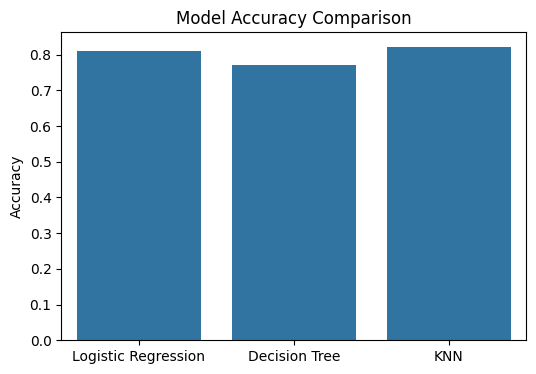

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# **Titanic Classification Project - Working & Details**

## 1. Dataset Loading
We use the Titanic dataset from Kaggle. It contains passenger details like age, gender, class, fare, etc., and the target variable **“Survived”** which indicates if a passenger survived (1) or not (0).

## 2. Features and Target
- **Features (X):** Passenger information such as age, sex, ticket class, fare, etc.
- **Target (y):** Survival status (Survived or Not Survived).

## 3. Preprocessing
Since raw data often contains missing values and categorical variables, we apply preprocessing techniques:
- **Numerical columns:** Missing values are filled with the mean, and values are standardized using scaling.
- **Categorical columns:** Missing values are filled with the most frequent value, and data is encoded using One-Hot Encoding.

This ensures that both numerical and categorical features are properly prepared for machine learning models.

## 4. Data Splitting
The dataset is split into training (80%) and testing (20%) sets to evaluate model performance fairly.

## 5. Models Used
We train and evaluate three classification models:
- **Logistic Regression** – A linear model suitable for binary classification.
- **Decision Tree** – A tree-based model that learns decision rules.
- **K-Nearest Neighbors (KNN)** – A distance-based model that classifies based on neighbors.

## 6. Model Evaluation
For each model:
- Predictions are made on the test set.
- **Accuracy** is calculated to compare models.
- A **Confusion Matrix** is generated to visualize correct vs incorrect predictions.
- A **Classification Report** is produced, showing Precision, Recall, and F1-Score.

## 7. Results Comparison
The models’ accuracies are compared using a bar chart, which helps identify the best-performing model.

## 8. Key Insights
- Preprocessing significantly improves model performance.
- Logistic Regression generally works well with structured datasets like Titanic.
- Decision Tree and KNN provide alternative approaches, which may perform better depending on hyperparameter tuning.

---
✅ Final Output: A trained classification pipeline with performance metrics (accuracy, confusion matrix, classification report) and a visual comparison of models.
